In [2]:
pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------- -------------------------------- 1.6/8.1 MB 8.7 MB/s eta 0:00:01
   ------------------ --------------------- 3.7/8.1 MB 8.5 MB/s eta 0:00:01
   ------------------------- -------------- 5.2/8.1 MB 8.5 MB/s eta 0:00:01
   ---------------------------------- ----- 7.1/8.1 MB 8.1 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 7.6 MB/s  0:00:01
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   ---------------------- ----------------- 1.3/2.3 MB 7.3 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 5.8 MB/s  0:00:00
   ---------------------------------------- 0.0/7.0 MB ? eta -:--:--
   ------- -------------------------------- 1.3/7.0 MB 7.8 MB/s eta 0:00:01
   ---------------- ----------------------- 2.9/7.0 MB 6.8 MB/s eta 0:00:01
   ----------------------- ---------------- 4.2/7.0 MB 6.7 MB/s eta 0:00:01
   -------------------------------- ---


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


K-MEANS CLUSTERING ANALYSIS

Dataset: Blobs (Spherical)

k=2, init='random':
  Silhouette Score: 0.7355
  ICSSD (Inertia): 2589.97
  Iterations to converge: 2

k=2, init='k-means++':
  Silhouette Score: 0.7355
  ICSSD (Inertia): 2589.97
  Iterations to converge: 2

k=3, init='random':
  Silhouette Score: 0.9072
  ICSSD (Inertia): 102.10
  Iterations to converge: 3

k=3, init='k-means++':
  Silhouette Score: 0.9072
  ICSSD (Inertia): 102.10
  Iterations to converge: 2

k=4, init='random':
  Silhouette Score: 0.7088
  ICSSD (Inertia): 87.48
  Iterations to converge: 7

k=4, init='k-means++':
  Silhouette Score: 0.7351
  ICSSD (Inertia): 87.43
  Iterations to converge: 5

k=5, init='random':
  Silhouette Score: 0.5197
  ICSSD (Inertia): 76.34
  Iterations to converge: 6

k=5, init='k-means++':
  Silhouette Score: 0.5178
  ICSSD (Inertia): 75.82
  Iterations to converge: 7


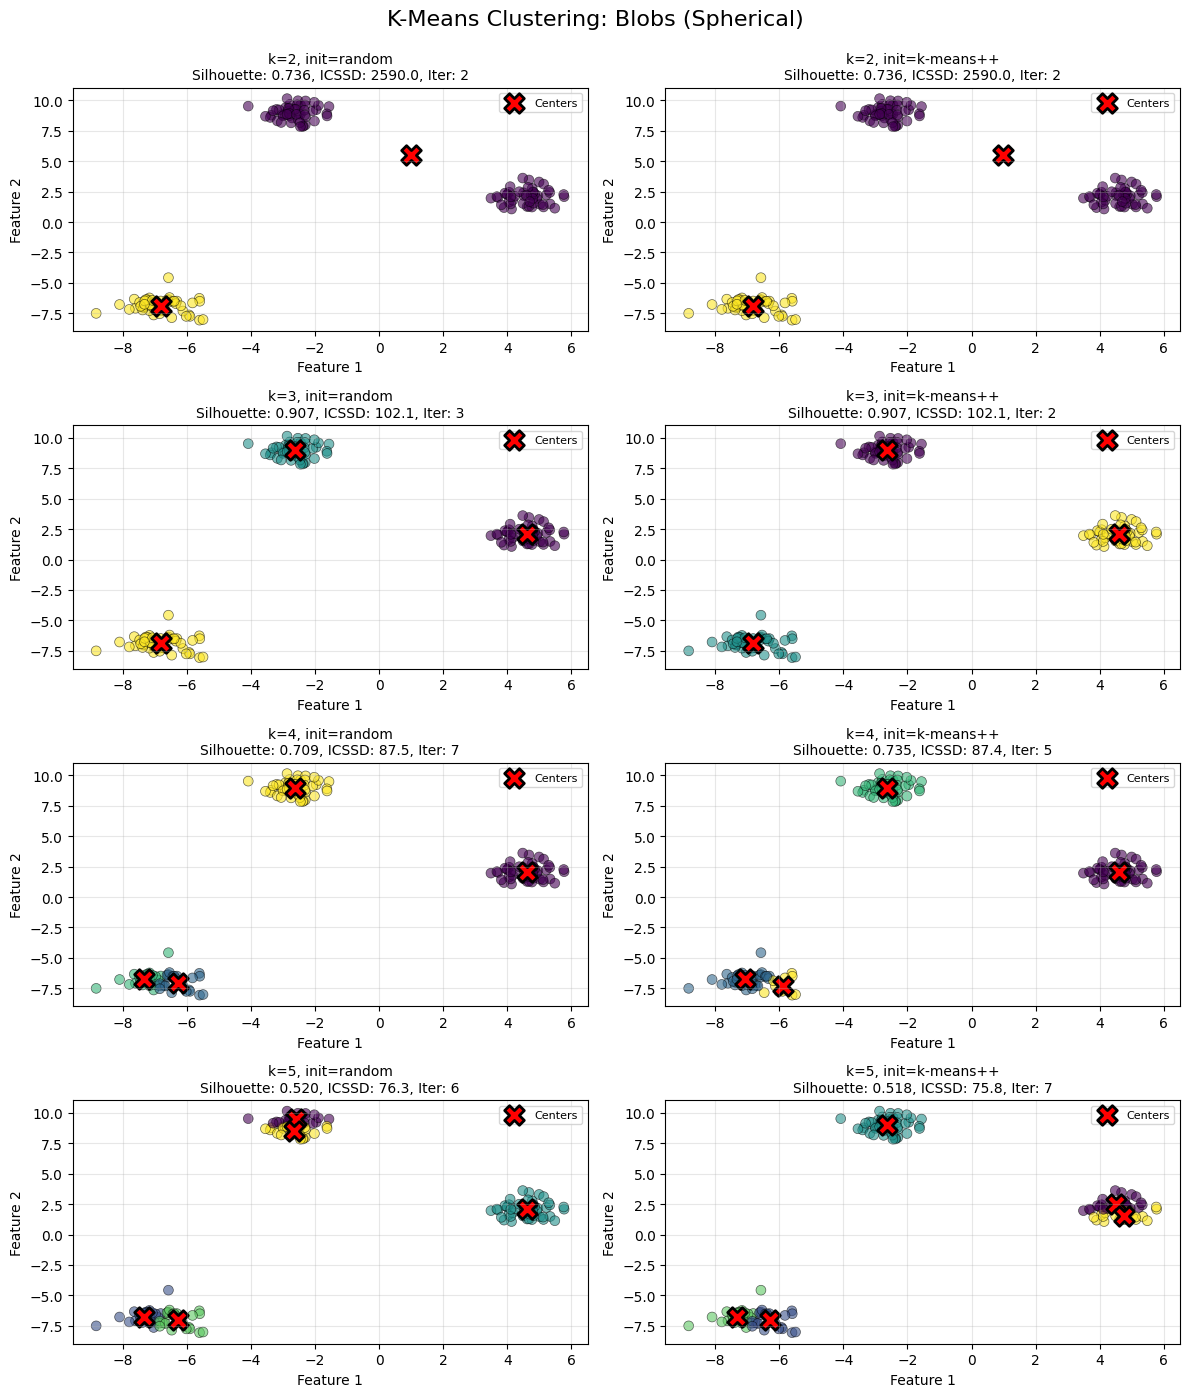

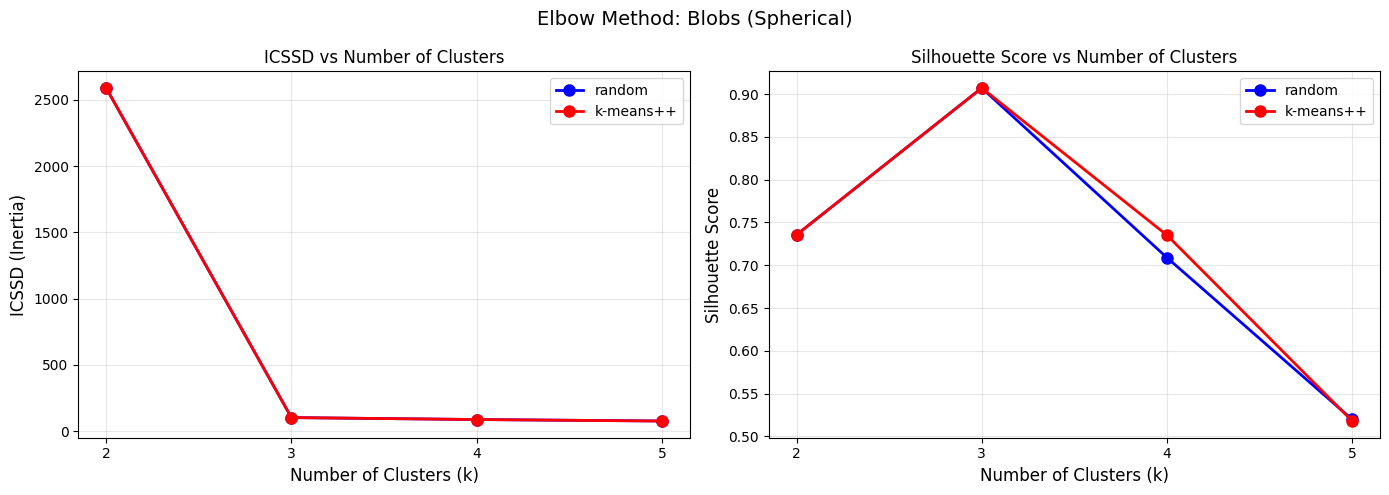


Dataset: Moons (Non-spherical)

k=2, init='random':
  Silhouette Score: 0.4934
  ICSSD (Inertia): 60.27
  Iterations to converge: 4

k=2, init='k-means++':
  Silhouette Score: 0.4934
  ICSSD (Inertia): 60.27
  Iterations to converge: 3

k=3, init='random':
  Silhouette Score: 0.4038
  ICSSD (Inertia): 41.53
  Iterations to converge: 5

k=3, init='k-means++':
  Silhouette Score: 0.4080
  ICSSD (Inertia): 41.24
  Iterations to converge: 9

k=4, init='random':
  Silhouette Score: 0.4297
  ICSSD (Inertia): 27.42
  Iterations to converge: 12

k=4, init='k-means++':
  Silhouette Score: 0.4289
  ICSSD (Inertia): 27.38
  Iterations to converge: 7

k=5, init='random':
  Silhouette Score: 0.4378
  ICSSD (Inertia): 21.39
  Iterations to converge: 13

k=5, init='k-means++':
  Silhouette Score: 0.4380
  ICSSD (Inertia): 21.13
  Iterations to converge: 4


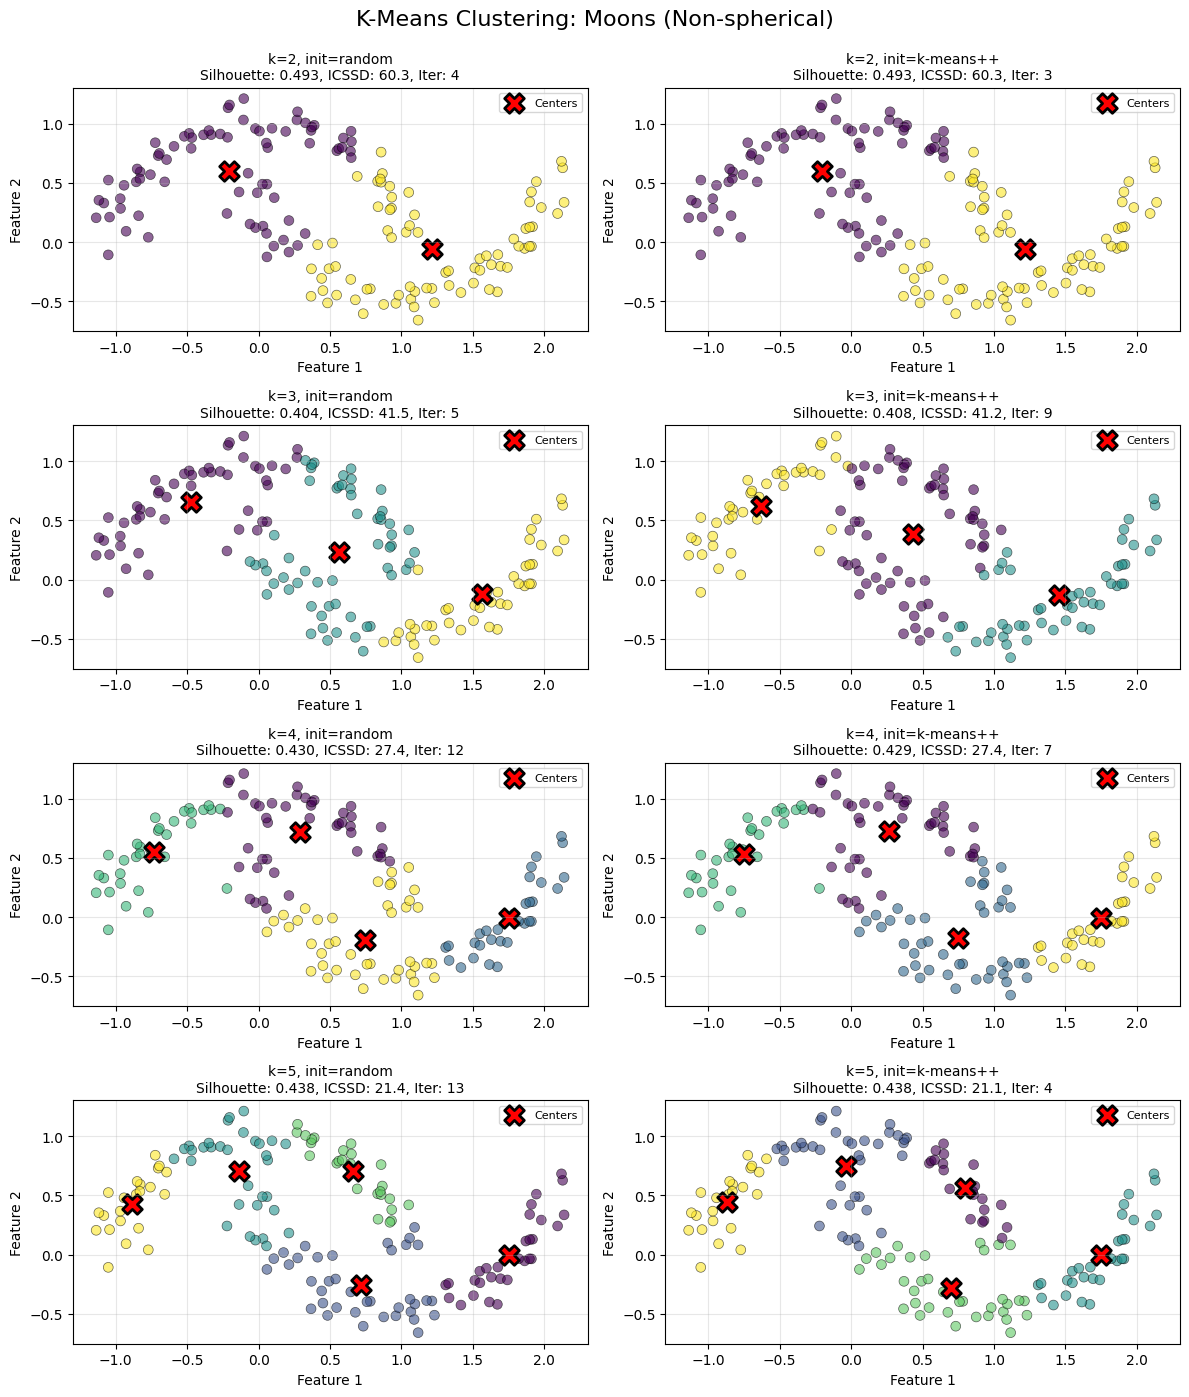

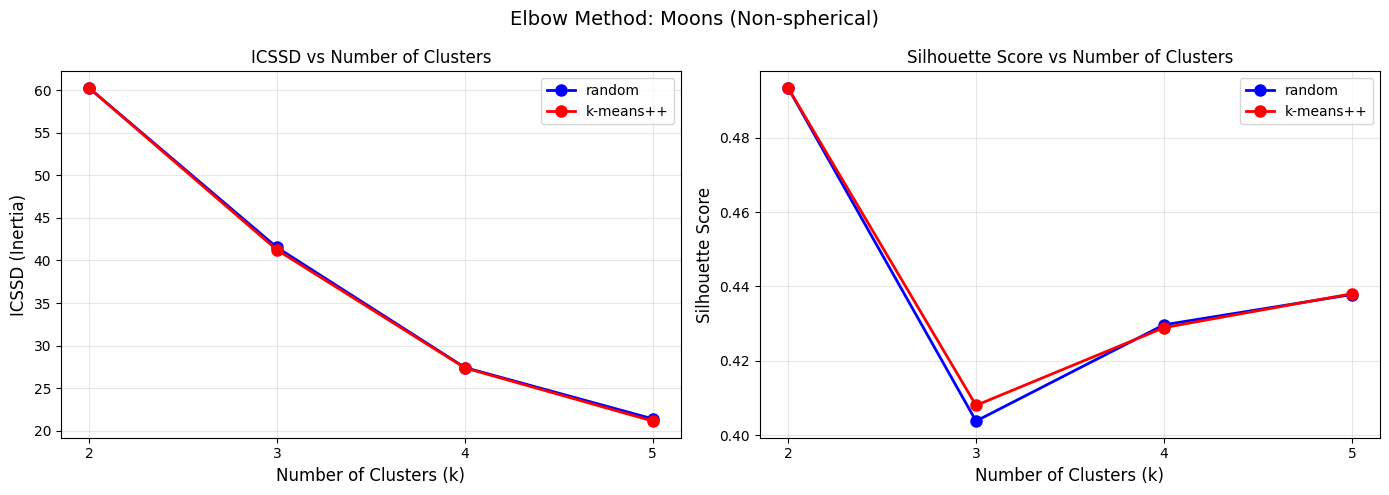


DISCUSSION AND ANALYSIS

1. EFFECT OF DIFFERENT INITIALIZATIONS:
--------------------------------------------------------------------------------

Initialization Strategy Comparison:

• k-means++ vs random:
  - k-means++ is a smarter initialization that selects initial centroids that are 
    far apart from each other, leading to:
    * Faster convergence (fewer iterations)
    * More consistent results across runs
    * Better final clustering quality (higher silhouette scores)
    * Less sensitivity to random seed

  - random initialization:
    * May require more iterations to converge
    * Can get stuck in local optima
    * Results may vary significantly across different runs
    * Generally produces slightly lower quality clusters

• From the results above, you can observe:
  - k-means++ typically converges in fewer iterations
  - Silhouette scores are often similar or slightly better with k-means++
  - ICSSD values are comparable, but k-means++ is more stable


2. WHICH DATASE

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs, make_moons
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic datasets (100-200 points for visual clarity)
n_samples = 150

# Dataset 1: Well-separated blobs
X_blobs, y_blobs = make_blobs(n_samples=n_samples, centers=3, n_features=2, 
                               cluster_std=0.6, random_state=42)

# Dataset 2: Non-linearly separable moons
X_moons, y_moons = make_moons(n_samples=n_samples, noise=0.1, random_state=42)

datasets = {
    'Blobs (Spherical)': X_blobs,
    'Moons (Non-spherical)': X_moons
}

# Parameters to test
k_values = [2, 3, 4, 5]
init_strategies = ['random', 'k-means++']

print("=" * 80)
print("K-MEANS CLUSTERING ANALYSIS")
print("=" * 80)

# Store results for analysis
results = {}

for dataset_name, X in datasets.items():
    print(f"\n{'='*80}")
    print(f"Dataset: {dataset_name}")
    print(f"{'='*80}")
    
    results[dataset_name] = {}
    
    # Create figure for visualizations
    fig, axes = plt.subplots(len(k_values), len(init_strategies), 
                             figsize=(12, 14))
    fig.suptitle(f'K-Means Clustering: {dataset_name}', fontsize=16, y=0.995)
    
    # Store ICSSD for elbow method
    icssd_random = []
    icssd_kmeanspp = []
    
    for i, k in enumerate(k_values):
        results[dataset_name][k] = {}
        
        for j, init in enumerate(init_strategies):
            # Apply K-Means clustering
            kmeans = KMeans(n_clusters=k, init=init, n_init=10, 
                           random_state=42, max_iter=300)
            labels = kmeans.fit_predict(X)
            centers = kmeans.cluster_centers_
            inertia = kmeans.inertia_  # ICSSD (Intra-Cluster Sum of Squared Distances)
            
            # Calculate silhouette score
            if k > 1:  # Silhouette score requires at least 2 clusters
                sil_score = silhouette_score(X, labels)
            else:
                sil_score = None
            
            # Store results
            results[dataset_name][k][init] = {
                'silhouette': sil_score,
                'inertia': inertia,
                'n_iter': kmeans.n_iter_
            }
            
            # Store ICSSD for elbow plot
            if init == 'random':
                icssd_random.append(inertia)
            else:
                icssd_kmeanspp.append(inertia)
            
            # Visualization
            ax = axes[i, j] if len(k_values) > 1 else axes[j]
            
            # Scatter plot with cluster colors
            scatter = ax.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', 
                                s=50, alpha=0.6, edgecolors='k', linewidth=0.5)
            
            # Plot cluster centers
            ax.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', 
                      s=200, edgecolors='black', linewidth=2, label='Centers')
            
            # Labels and title
            title = f'k={k}, init={init}\n'
            if sil_score is not None:
                title += f'Silhouette: {sil_score:.3f}, '
            title += f'ICSSD: {inertia:.1f}, Iter: {kmeans.n_iter_}'
            ax.set_title(title, fontsize=10)
            ax.set_xlabel('Feature 1')
            ax.set_ylabel('Feature 2')
            ax.legend(loc='best', fontsize=8)
            ax.grid(True, alpha=0.3)
            
            # Print results
            print(f"\nk={k}, init='{init}':")
            print(f"  Silhouette Score: {sil_score:.4f}" if sil_score else "  Silhouette Score: N/A")
            print(f"  ICSSD (Inertia): {inertia:.2f}")
            print(f"  Iterations to converge: {kmeans.n_iter_}")
    
    plt.tight_layout()
    plt.savefig(f'kmeans_{dataset_name.replace(" ", "_").replace("(", "").replace(")", "")}.png', 
                dpi=300, bbox_inches='tight')
    plt.show()
    
    # Elbow Method Plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    fig.suptitle(f'Elbow Method: {dataset_name}', fontsize=14)
    
    # Plot for both initialization strategies
    ax1.plot(k_values, icssd_random, 'bo-', linewidth=2, markersize=8, label='random')
    ax1.plot(k_values, icssd_kmeanspp, 'ro-', linewidth=2, markersize=8, label='k-means++')
    ax1.set_xlabel('Number of Clusters (k)', fontsize=12)
    ax1.set_ylabel('ICSSD (Inertia)', fontsize=12)
    ax1.set_title('ICSSD vs Number of Clusters', fontsize=12)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.set_xticks(k_values)
    
    # Silhouette scores comparison
    sil_random = [results[dataset_name][k]['random']['silhouette'] for k in k_values if k > 1]
    sil_kmeanspp = [results[dataset_name][k]['k-means++']['silhouette'] for k in k_values if k > 1]
    k_values_sil = [k for k in k_values if k > 1]
    
    ax2.plot(k_values_sil, sil_random, 'bo-', linewidth=2, markersize=8, label='random')
    ax2.plot(k_values_sil, sil_kmeanspp, 'ro-', linewidth=2, markersize=8, label='k-means++')
    ax2.set_xlabel('Number of Clusters (k)', fontsize=12)
    ax2.set_ylabel('Silhouette Score', fontsize=12)
    ax2.set_title('Silhouette Score vs Number of Clusters', fontsize=12)
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    ax2.set_xticks(k_values_sil)
    
    plt.tight_layout()
    plt.savefig(f'elbow_method_{dataset_name.replace(" ", "_").replace("(", "").replace(")", "")}.png', 
                dpi=300, bbox_inches='tight')
    plt.show()

# ============================================================================
# DISCUSSION AND ANALYSIS
# ============================================================================

print("\n" + "="*80)
print("DISCUSSION AND ANALYSIS")
print("="*80)

print("\n1. EFFECT OF DIFFERENT INITIALIZATIONS:")
print("-" * 80)
print("""
Initialization Strategy Comparison:

• k-means++ vs random:
  - k-means++ is a smarter initialization that selects initial centroids that are 
    far apart from each other, leading to:
    * Faster convergence (fewer iterations)
    * More consistent results across runs
    * Better final clustering quality (higher silhouette scores)
    * Less sensitivity to random seed
  
  - random initialization:
    * May require more iterations to converge
    * Can get stuck in local optima
    * Results may vary significantly across different runs
    * Generally produces slightly lower quality clusters

• From the results above, you can observe:
  - k-means++ typically converges in fewer iterations
  - Silhouette scores are often similar or slightly better with k-means++
  - ICSSD values are comparable, but k-means++ is more stable
""")

print("\n2. WHICH DATASET IS BETTER SUITED FOR K-MEANS?")
print("-" * 80)
print("""
Dataset Suitability Analysis:

• BLOBS (Well-separated, Spherical Clusters):
  ✓ EXCELLENT fit for K-Means
  - K-Means assumes spherical, convex clusters with similar sizes
  - Blobs dataset perfectly matches these assumptions
  - High silhouette scores indicate well-separated clusters
  - Clear "elbow" in ICSSD plot helps identify optimal k
  - Cluster centers accurately represent cluster centroids

• MOONS (Non-linearly Separable, Non-spherical):
  ✗ POOR fit for K-Means
  - Crescent/moon shapes violate K-Means' spherical cluster assumption
  - K-Means uses Euclidean distance, which fails for non-convex shapes
  - Lower silhouette scores reflect poor cluster separation
  - Visual inspection shows K-Means splits natural clusters incorrectly
  - Would benefit from density-based methods (DBSCAN) or spectral clustering

CONCLUSION: Blobs dataset is FAR better suited for K-Means clustering.
""")

print("\n3. HOW DOES THE CHOICE OF k AFFECT CLUSTERING QUALITY?")
print("-" * 80)
print("""
Impact of k on Clustering Quality:

• Too Few Clusters (k < true number):
  - Under-segmentation: Natural clusters are merged together
  - Higher ICSSD values (poor fit)
  - Lower silhouette scores (overlapping clusters)
  - Loss of meaningful structure in the data

• Optimal k (k = true number of clusters):
  - Best balance between cluster separation and cohesion
  - "Elbow" point in ICSSD curve (diminishing returns begin)
  - Maximum or near-maximum silhouette score
  - Clusters align with natural data structure

• Too Many Clusters (k > true number):
  - Over-segmentation: Natural clusters are split unnecessarily
  - Lower ICSSD (always decreases with more clusters)
  - Decreasing silhouette scores (artificial splitting)
  - Loss of interpretability and generalization

• Elbow Method Guidance:
  - For Blobs: Clear elbow at k=3 (true number of clusters)
  - For Moons: No clear elbow (data doesn't fit K-Means assumptions)
  - ICSSD always decreases with k, but rate of decrease slows after optimal k

• Silhouette Score Guidance:
  - Peak silhouette score often indicates optimal k
  - For Blobs: Highest at k=3
  - For Moons: All scores are low (K-Means inappropriate for this data)

RECOMMENDATION: Use elbow method + silhouette score + domain knowledge
to select optimal k.
""")

print("\n" + "="*80)
print("ANALYSIS COMPLETE")
print("="*80)
print("\nKey Takeaways:")
print("1. k-means++ initialization is superior to random initialization")
print("2. K-Means works best on spherical, well-separated clusters (Blobs)")
print("3. K-Means fails on non-convex, non-spherical data (Moons)")
print("4. Optimal k balances cluster fit with model complexity")
print("5. Use multiple metrics (elbow method, silhouette score) to choose k")
print("="*80)

EXPECTATION-MAXIMIZATION (GAUSSIAN MIXTURE MODELS) ANALYSIS

Dataset: Blobs (Spherical)

k=2, covariance_type='full':
  Silhouette Score: 0.7355
  Average Log-Likelihood: -3.8662
  BIC: 1214.97
  Iterations to converge: 2
  Converged: True

k=2, covariance_type='diag':
  Silhouette Score: 0.7355
  Average Log-Likelihood: -4.8645
  BIC: 1504.45
  Iterations to converge: 2
  Converged: True

k=3, covariance_type='full':
  Silhouette Score: 0.9072
  Average Log-Likelihood: -2.8378
  BIC: 936.52
  Iterations to converge: 2
  Converged: True

k=3, covariance_type='diag':
  Silhouette Score: 0.9072
  Average Log-Likelihood: -2.8405
  BIC: 922.30
  Iterations to converge: 2
  Converged: True

k=4, covariance_type='full':
  Silhouette Score: 0.7120
  Average Log-Likelihood: -2.8120
  BIC: 958.84
  Iterations to converge: 8
  Converged: True

k=4, covariance_type='diag':
  Silhouette Score: 0.7334
  Average Log-Likelihood: -2.8166
  BIC: 940.17
  Iterations to converge: 6
  Converged: True

k=5

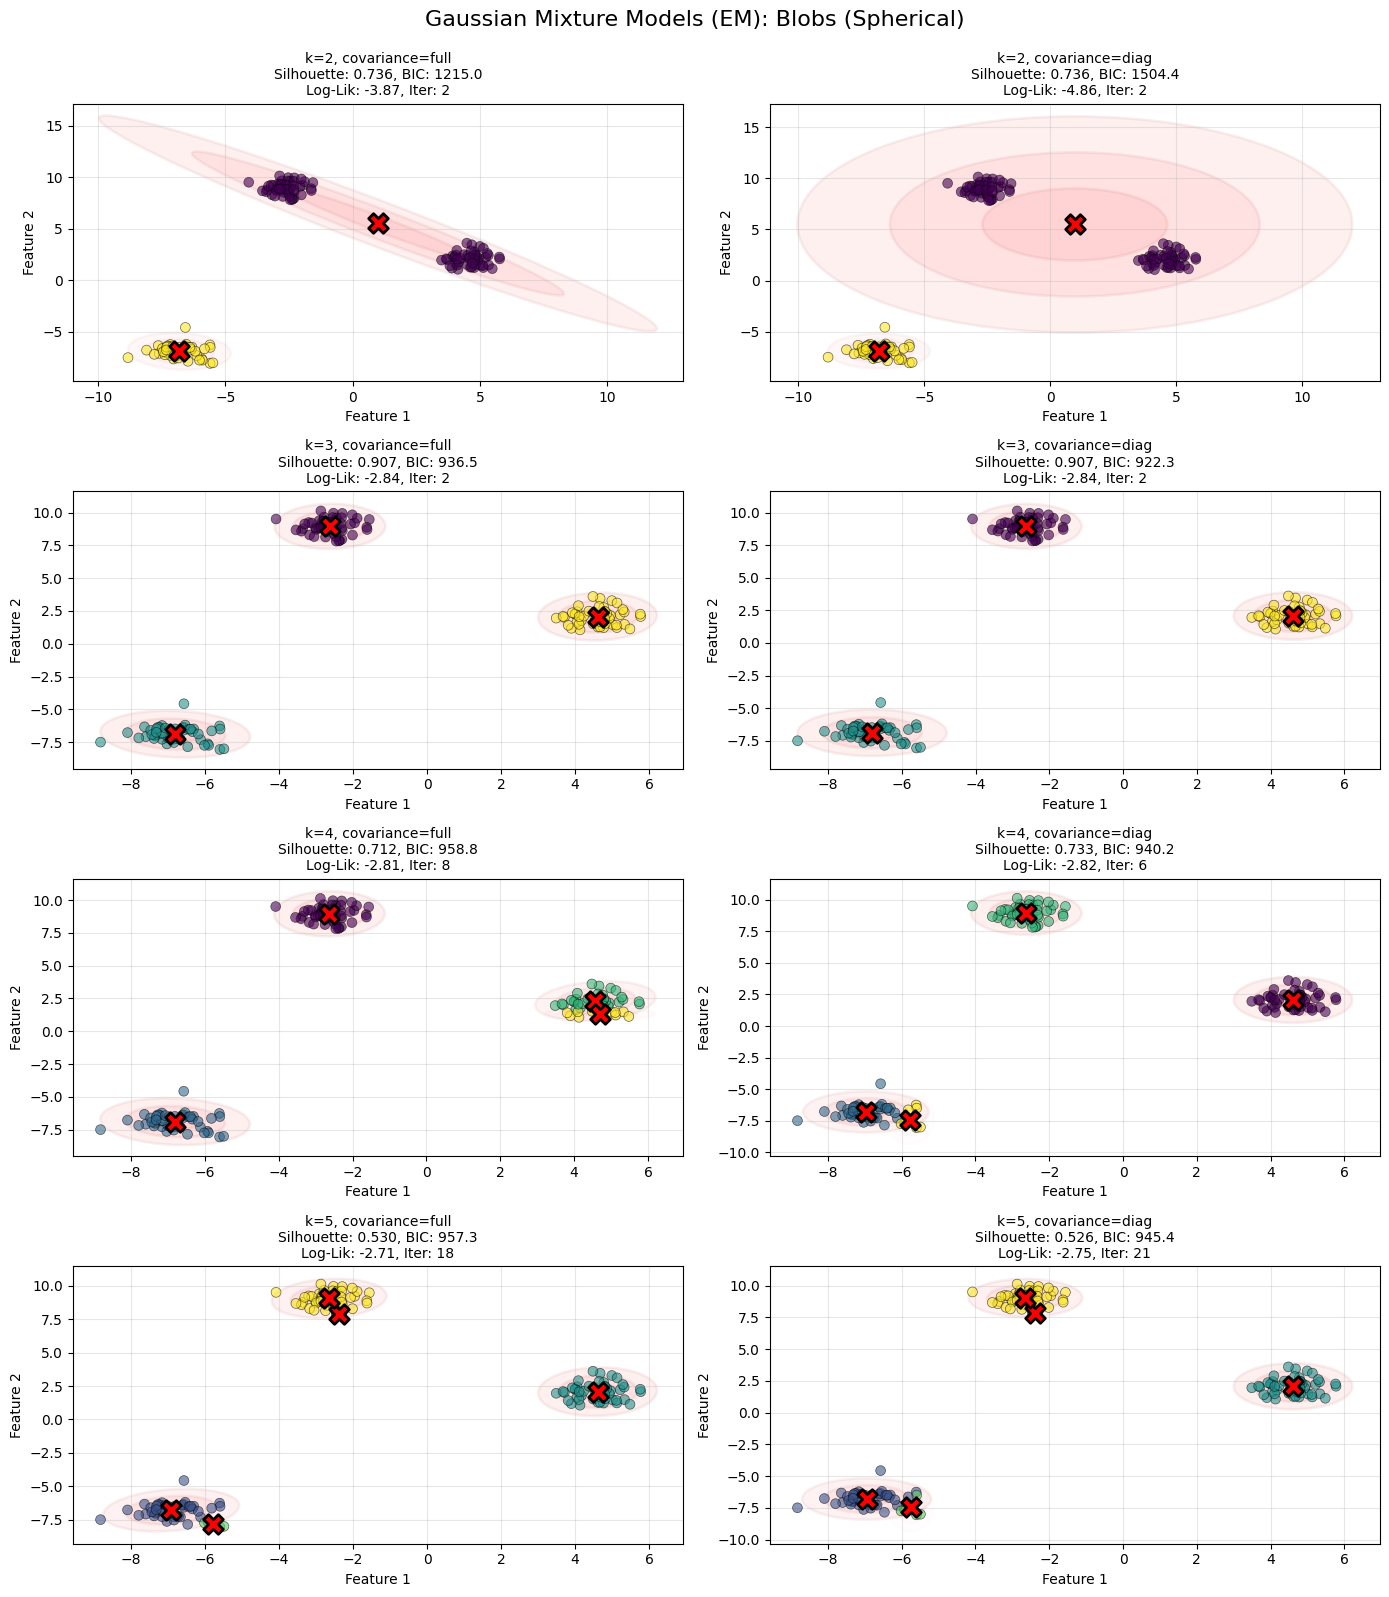

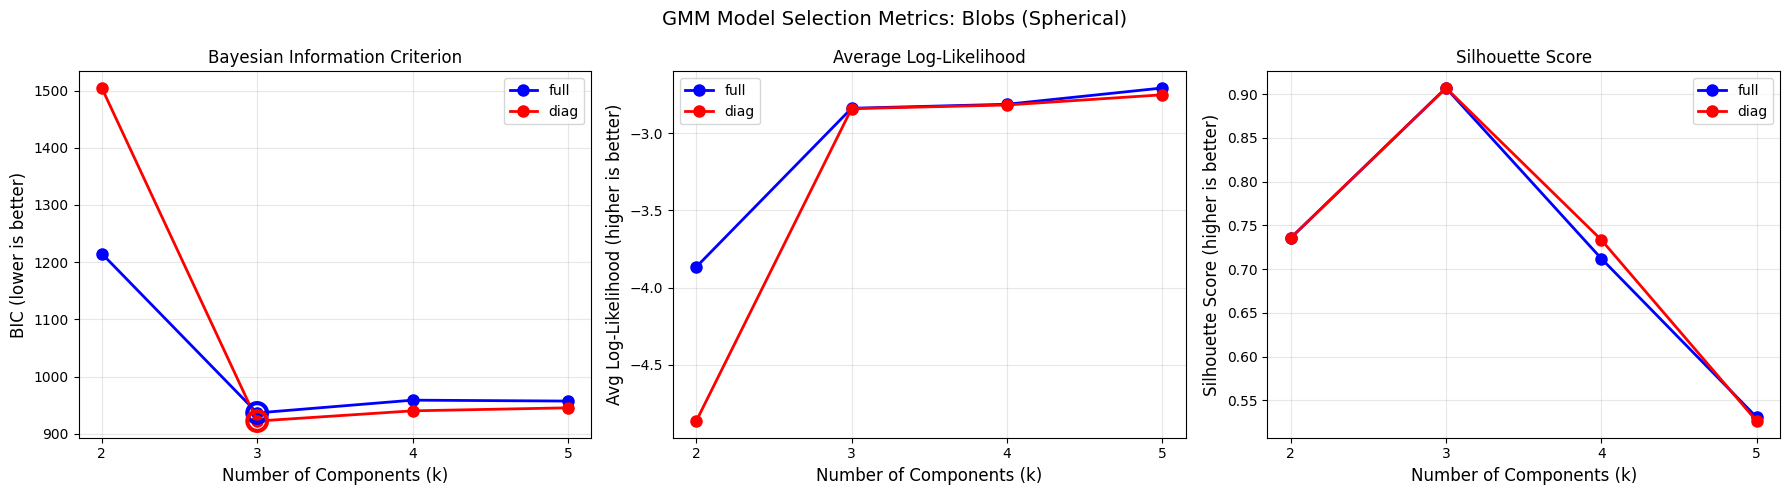


Dataset: Moons (Non-spherical)

k=2, covariance_type='full':
  Silhouette Score: 0.4673
  Average Log-Likelihood: -1.7238
  BIC: 572.27
  Iterations to converge: 4
  Converged: True

k=2, covariance_type='diag':
  Silhouette Score: 0.4673
  Average Log-Likelihood: -1.7665
  BIC: 575.05
  Iterations to converge: 5
  Converged: True

k=3, covariance_type='full':
  Silhouette Score: 0.3858
  Average Log-Likelihood: -1.4618
  BIC: 523.71
  Iterations to converge: 20
  Converged: True

k=3, covariance_type='diag':
  Silhouette Score: 0.3795
  Average Log-Likelihood: -1.6110
  BIC: 553.46
  Iterations to converge: 19
  Converged: True

k=4, covariance_type='full':
  Silhouette Score: 0.4472
  Average Log-Likelihood: -1.2795
  BIC: 499.09
  Iterations to converge: 17
  Converged: True

k=4, covariance_type='diag':
  Silhouette Score: 0.3535
  Average Log-Likelihood: -1.5330
  BIC: 555.11
  Iterations to converge: 16
  Converged: True

k=5, covariance_type='full':
  Silhouette Score: 0.4483
 

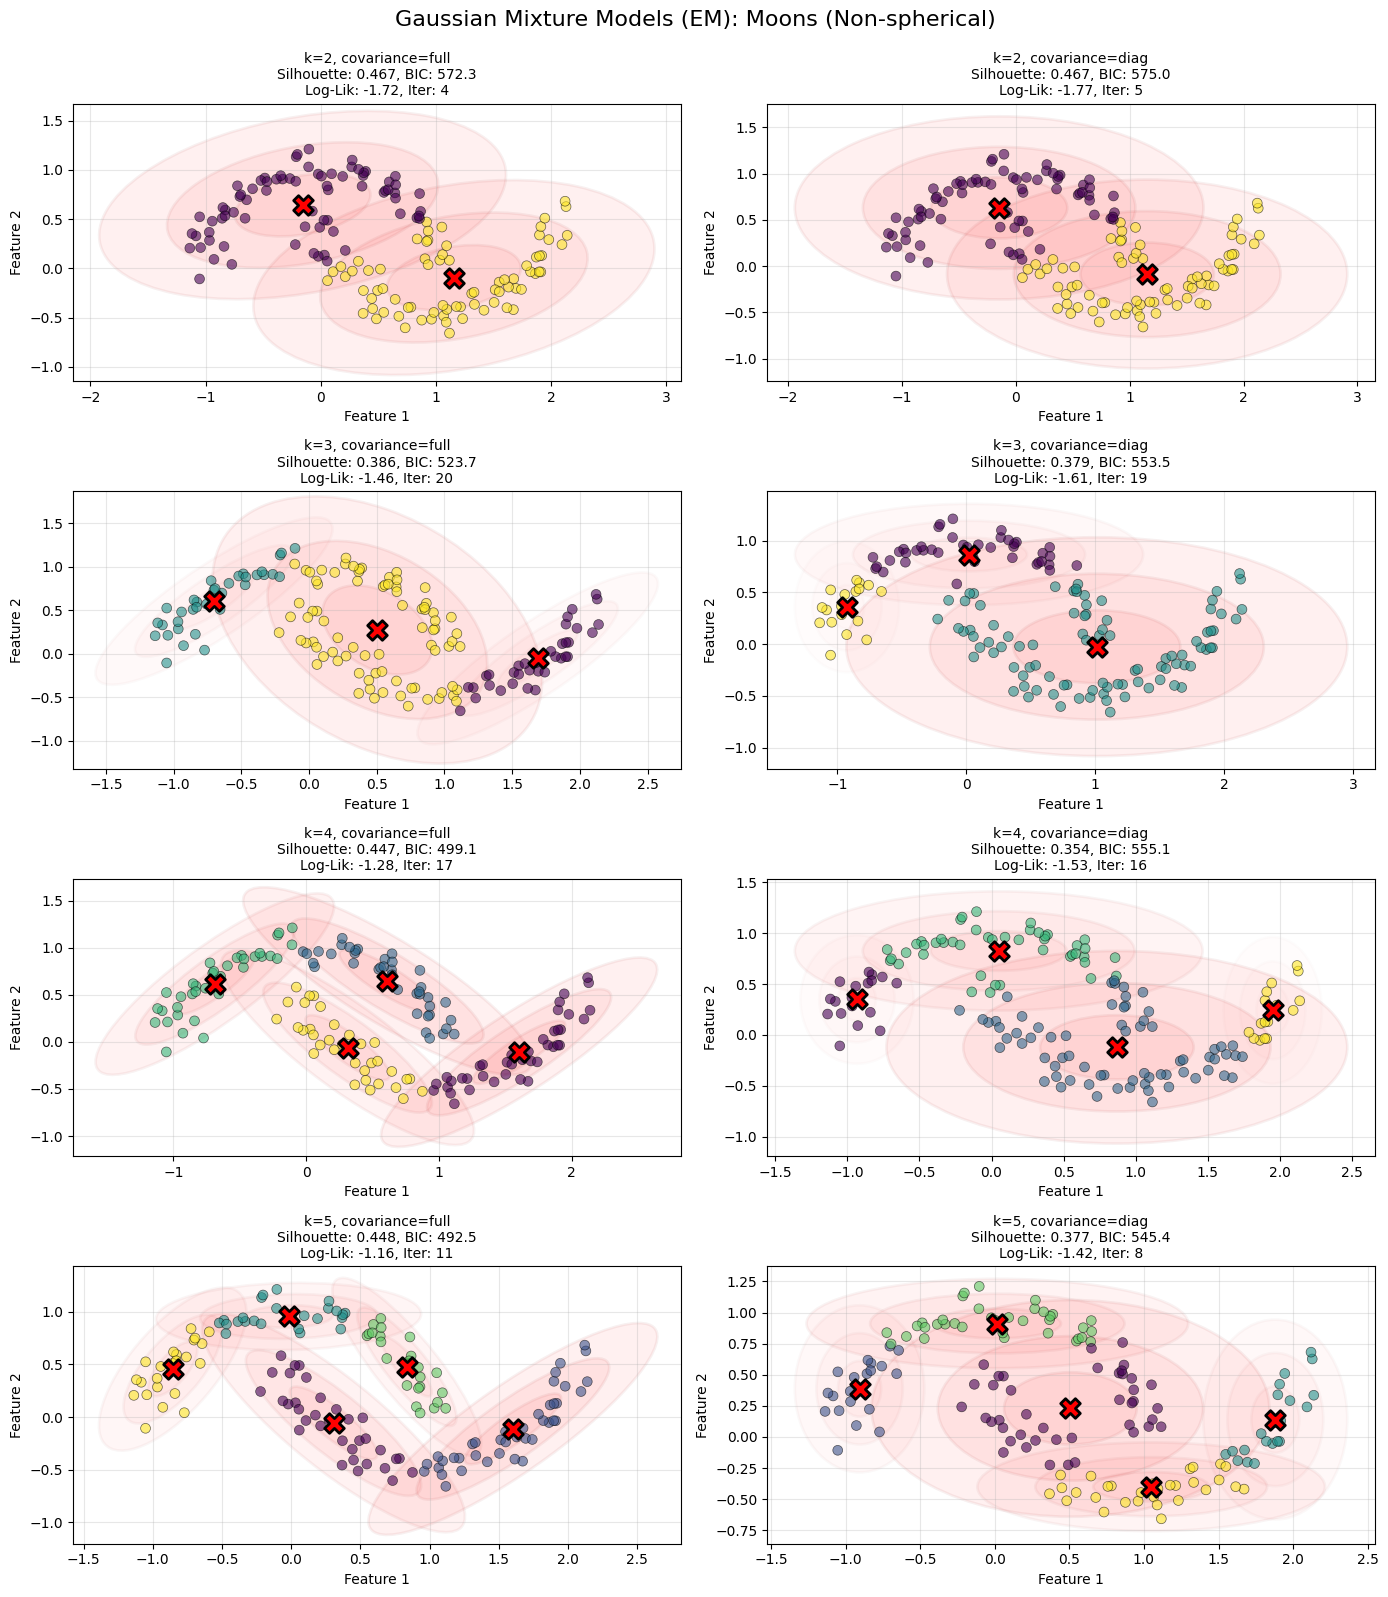

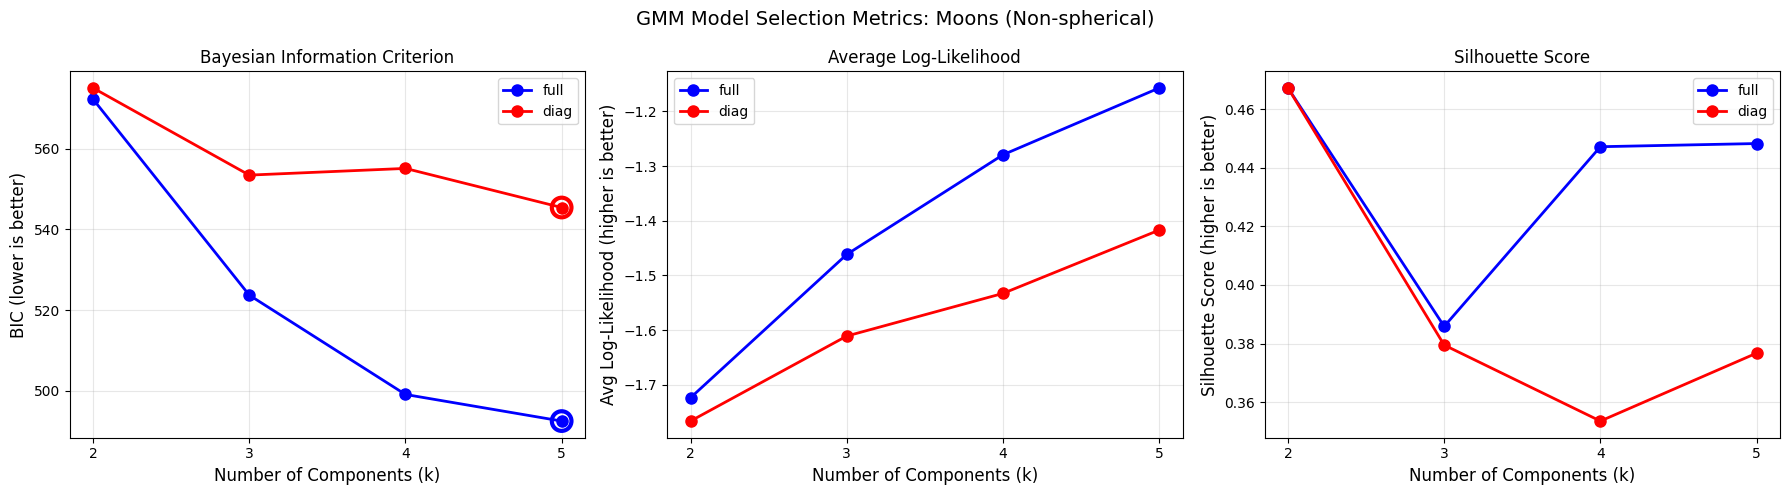


DISCUSSION AND ANALYSIS

1. GMMs HANDLE ELLIPTICAL CLUSTERS BETTER THAN K-MEANS
--------------------------------------------------------------------------------

Comparison: GMM vs K-Means on Different Cluster Shapes

• BLOBS Dataset (Spherical Clusters):
  - K-Means Performance: EXCELLENT
    * K-Means assumes spherical clusters (equal variance in all directions)
    * Blobs naturally match this assumption
    * Results: Clean separation, high silhouette scores

  - GMM Performance: EXCELLENT (slightly better flexibility)
    * GMMs can model spherical clusters (when covariances are similar)
    * Additional flexibility: can model slight elliptical variations
    * 'full' covariance: Models general ellipses (any orientation)
    * 'diag' covariance: Models axis-aligned ellipses
    * Results: Similar or slightly better than K-Means, more probabilistic

  CONCLUSION: Both work well on blobs, but GMM provides probabilistic 
  membership and can adapt to slight shape variations.

• MOON

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs, make_moons
from sklearn.metrics import silhouette_score
from scipy import linalg
import warnings
warnings.filterwarnings('ignore')

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic datasets (same as Part 1 for comparison)
n_samples = 150

# Dataset 1: Well-separated blobs
X_blobs, y_blobs = make_blobs(n_samples=n_samples, centers=3, n_features=2, 
                               cluster_std=0.6, random_state=42)

# Dataset 2: Non-linearly separable moons
X_moons, y_moons = make_moons(n_samples=n_samples, noise=0.1, random_state=42)

datasets = {
    'Blobs (Spherical)': X_blobs,
    'Moons (Non-spherical)': X_moons
}

# Parameters to test
k_values = [2, 3, 4, 5]
covariance_types = ['full', 'diag']

# Function to draw confidence ellipse for Gaussian components
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse representing a 2D Gaussian distribution."""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):  # 1, 2, 3 sigma contours
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle=angle, **kwargs))

def plot_gmm(gmm, X, label=None, ax=None):
    """Plot GMM clusters with ellipses."""
    ax = ax or plt.gca()
    labels = gmm.fit_predict(X)
    
    # Plot data points
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis', 
              alpha=0.6, edgecolors='k', linewidth=0.5, zorder=2)
    
    # Plot Gaussian components as ellipses
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, ax=ax, alpha=0.3 * w * w_factor, 
                    facecolor='red', edgecolor='darkred', linewidth=2, zorder=1)
        # Mark centers
        ax.scatter(pos[0], pos[1], c='red', marker='X', s=200, 
                  edgecolors='black', linewidth=2, zorder=3)

print("=" * 80)
print("EXPECTATION-MAXIMIZATION (GAUSSIAN MIXTURE MODELS) ANALYSIS")
print("=" * 80)

# Store results for analysis
results = {}

for dataset_name, X in datasets.items():
    print(f"\n{'='*80}")
    print(f"Dataset: {dataset_name}")
    print(f"{'='*80}")
    
    results[dataset_name] = {}
    
    # Create figure for visualizations
    fig, axes = plt.subplots(len(k_values), len(covariance_types), 
                             figsize=(14, 16))
    fig.suptitle(f'Gaussian Mixture Models (EM): {dataset_name}', 
                 fontsize=16, y=0.995)
    
    # Store metrics for comparison plots
    bic_full = []
    bic_diag = []
    loglik_full = []
    loglik_diag = []
    sil_full = []
    sil_diag = []
    
    for i, k in enumerate(k_values):
        results[dataset_name][k] = {}
        
        for j, cov_type in enumerate(covariance_types):
            # Apply Gaussian Mixture Model (EM algorithm)
            gmm = GaussianMixture(n_components=k, covariance_type=cov_type,
                                 random_state=42, n_init=10, max_iter=200)
            gmm.fit(X)
            labels = gmm.predict(X)
            
            # Calculate metrics
            # 1. Silhouette Score
            if k > 1:
                sil_score = silhouette_score(X, labels)
            else:
                sil_score = None
            
            # 2. Average Log-Likelihood (per sample)
            log_likelihood = gmm.score(X)  # Returns mean log-likelihood
            
            # 3. Bayesian Information Criterion (BIC)
            bic_score = gmm.bic(X)
            
            # 4. Number of iterations to converge
            n_iter = gmm.n_iter_
            
            # Store results
            results[dataset_name][k][cov_type] = {
                'silhouette': sil_score,
                'log_likelihood': log_likelihood,
                'bic': bic_score,
                'n_iter': n_iter,
                'converged': gmm.converged_
            }
            
            # Store for comparison plots
            if cov_type == 'full':
                bic_full.append(bic_score)
                loglik_full.append(log_likelihood)
                if sil_score is not None:
                    sil_full.append(sil_score)
            else:
                bic_diag.append(bic_score)
                loglik_diag.append(log_likelihood)
                if sil_score is not None:
                    sil_diag.append(sil_score)
            
            # Visualization
            ax = axes[i, j] if len(k_values) > 1 else axes[j]
            
            # Plot GMM with ellipses
            plot_gmm(gmm, X, ax=ax)
            
            # Labels and title
            title = f'k={k}, covariance={cov_type}\n'
            if sil_score is not None:
                title += f'Silhouette: {sil_score:.3f}, '
            title += f'BIC: {bic_score:.1f}\n'
            title += f'Log-Lik: {log_likelihood:.2f}, Iter: {n_iter}'
            
            ax.set_title(title, fontsize=10)
            ax.set_xlabel('Feature 1')
            ax.set_ylabel('Feature 2')
            ax.grid(True, alpha=0.3)
            
            # Print results
            print(f"\nk={k}, covariance_type='{cov_type}':")
            print(f"  Silhouette Score: {sil_score:.4f}" if sil_score else "  Silhouette Score: N/A")
            print(f"  Average Log-Likelihood: {log_likelihood:.4f}")
            print(f"  BIC: {bic_score:.2f}")
            print(f"  Iterations to converge: {n_iter}")
            print(f"  Converged: {gmm.converged_}")
    
    plt.tight_layout()
    plt.savefig(f'gmm_{dataset_name.replace(" ", "_").replace("(", "").replace(")", "")}.png', 
                dpi=300, bbox_inches='tight')
    plt.show()
    
    # Model Selection Plots (BIC, Log-Likelihood, Silhouette)
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle(f'GMM Model Selection Metrics: {dataset_name}', fontsize=14)
    
    # BIC Plot (Lower is better)
    ax1 = axes[0]
    ax1.plot(k_values, bic_full, 'bo-', linewidth=2, markersize=8, label='full')
    ax1.plot(k_values, bic_diag, 'ro-', linewidth=2, markersize=8, label='diag')
    ax1.set_xlabel('Number of Components (k)', fontsize=12)
    ax1.set_ylabel('BIC (lower is better)', fontsize=12)
    ax1.set_title('Bayesian Information Criterion', fontsize=12)
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    ax1.set_xticks(k_values)
    
    # Mark minimum BIC
    min_bic_full_idx = np.argmin(bic_full)
    min_bic_diag_idx = np.argmin(bic_diag)
    ax1.scatter(k_values[min_bic_full_idx], bic_full[min_bic_full_idx], 
               s=200, facecolors='none', edgecolors='blue', linewidth=3, zorder=5)
    ax1.scatter(k_values[min_bic_diag_idx], bic_diag[min_bic_diag_idx], 
               s=200, facecolors='none', edgecolors='red', linewidth=3, zorder=5)
    
    # Log-Likelihood Plot (Higher is better)
    ax2 = axes[1]
    ax2.plot(k_values, loglik_full, 'bo-', linewidth=2, markersize=8, label='full')
    ax2.plot(k_values, loglik_diag, 'ro-', linewidth=2, markersize=8, label='diag')
    ax2.set_xlabel('Number of Components (k)', fontsize=12)
    ax2.set_ylabel('Avg Log-Likelihood (higher is better)', fontsize=12)
    ax2.set_title('Average Log-Likelihood', fontsize=12)
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    ax2.set_xticks(k_values)
    
    # Silhouette Score Plot (Higher is better)
    ax3 = axes[2]
    k_values_sil = [k for k in k_values if k > 1]
    ax3.plot(k_values_sil, sil_full, 'bo-', linewidth=2, markersize=8, label='full')
    ax3.plot(k_values_sil, sil_diag, 'ro-', linewidth=2, markersize=8, label='diag')
    ax3.set_xlabel('Number of Components (k)', fontsize=12)
    ax3.set_ylabel('Silhouette Score (higher is better)', fontsize=12)
    ax3.set_title('Silhouette Score', fontsize=12)
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    ax3.set_xticks(k_values_sil)
    
    plt.tight_layout()
    plt.savefig(f'gmm_metrics_{dataset_name.replace(" ", "_").replace("(", "").replace(")", "")}.png', 
                dpi=300, bbox_inches='tight')
    plt.show()

# ============================================================================
# DISCUSSION AND ANALYSIS
# ============================================================================

print("\n" + "="*80)
print("DISCUSSION AND ANALYSIS")
print("="*80)

print("\n1. GMMs HANDLE ELLIPTICAL CLUSTERS BETTER THAN K-MEANS")
print("-" * 80)
print("""
Comparison: GMM vs K-Means on Different Cluster Shapes

• BLOBS Dataset (Spherical Clusters):
  - K-Means Performance: EXCELLENT
    * K-Means assumes spherical clusters (equal variance in all directions)
    * Blobs naturally match this assumption
    * Results: Clean separation, high silhouette scores
  
  - GMM Performance: EXCELLENT (slightly better flexibility)
    * GMMs can model spherical clusters (when covariances are similar)
    * Additional flexibility: can model slight elliptical variations
    * 'full' covariance: Models general ellipses (any orientation)
    * 'diag' covariance: Models axis-aligned ellipses
    * Results: Similar or slightly better than K-Means, more probabilistic
  
  CONCLUSION: Both work well on blobs, but GMM provides probabilistic 
  membership and can adapt to slight shape variations.

• MOONS Dataset (Non-convex, Crescent-shaped Clusters):
  - K-Means Performance: POOR
    * Fails completely - tries to fit circular boundaries
    * Splits natural crescent shapes incorrectly
    * Low silhouette scores indicate poor separation
    * Cannot capture the true structure
  
  - GMM Performance: BETTER (but still limited)
    * Can use multiple Gaussian components to approximate crescents
    * With enough components (k=4 or k=5), better approximation
    * 'full' covariance allows rotated ellipses → better crescent fit
    * Probabilistic soft assignments help with overlapping regions
    * Results: Improved over K-Means, but still not perfect
    * LIMITATION: GMMs still assume Gaussian distributions
    * For truly non-convex shapes, consider DBSCAN or spectral clustering
  
  CONCLUSION: GMMs significantly outperform K-Means on non-convex data,
  but density-based methods would be even better.

KEY INSIGHT: GMMs model data as a mixture of Gaussian distributions with
elliptical contours. This allows them to:
  1. Fit elongated or stretched clusters
  2. Model clusters of different sizes
  3. Approximate complex shapes with multiple components
  4. Provide probabilistic cluster membership (soft clustering)
""")

print("\n2. SCENARIOS WHERE EM (GMM) OUTPERFORMS K-MEANS")
print("-" * 80)
print("""
EM (GMM) is Superior to K-Means When:

✓ 1. ELLIPTICAL/ELONGATED CLUSTERS
   - GMMs naturally model elliptical shapes
   - K-Means can only model spherical clusters
   - Example: Customer segments with different variance in features

✓ 2. CLUSTERS OF DIFFERENT SIZES
   - GMMs can assign different weights to components
   - K-Means assumes equal-sized clusters
   - Example: Market segmentation with minority segments

✓ 3. CLUSTERS WITH DIFFERENT DENSITIES
   - GMMs model different covariance structures
   - K-Means uses Euclidean distance (assumes equal density)
   - Example: Anomaly detection with rare vs common patterns

✓ 4. OVERLAPPING CLUSTERS
   - GMMs provide soft (probabilistic) assignments
   - K-Means forces hard assignments
   - Example: Document clustering with mixed topics
   - GMM gives P(cluster|data), useful for uncertainty quantification

✓ 5. NON-CONVEX SHAPES (with multiple components)
   - GMMs can approximate complex shapes using mixture of Gaussians
   - K-Means limited to convex boundaries
   - Example: Image segmentation with irregular regions

✓ 6. WHEN PROBABILISTIC INTERPRETATION IS NEEDED
   - GMMs provide likelihood of data under the model
   - Useful for: anomaly detection, generative modeling, density estimation
   - K-Means only provides distances, not probabilities

✓ 7. MODEL SELECTION WITH PRINCIPLED CRITERIA
   - GMMs can use BIC/AIC for selecting number of components
   - These criteria balance fit and complexity
   - K-Means relies on heuristics (elbow method, silhouette)

K-Means is Better When:
  - Clusters are truly spherical and well-separated
  - Need fast computation (K-Means is faster)
  - Working with very high dimensions
  - Simple interpretability is priority
""")

print("\n3. HOW COVARIANCE TYPE INFLUENCES CLUSTER SHAPE AND SEPARATION")
print("-" * 80)
print("""
Covariance Type Comparison:

• 'full' Covariance (General Ellipses):
  
  Model: Each component has a full covariance matrix (2×2 for 2D)
  
  Allows:
    - Ellipses with any orientation (can be rotated)
    - Different variances in different directions
    - Correlation between features
  
  Parameters: k × d × (d+1)/2 covariance parameters
  For 2D: Each component has 3 parameters (var_x, var_y, cov_xy)
  
  Advantages:
    ✓ Maximum flexibility in modeling cluster shapes
    ✓ Can capture rotated, stretched clusters
    ✓ Best for complex, real-world data
    ✓ Better log-likelihood (better fit to data)
  
  Disadvantages:
    ✗ More parameters → risk of overfitting
    ✗ Higher computational cost
    ✗ Requires more data to estimate reliably
    ✗ Higher BIC penalty for complexity
  
  Best for: Complex datasets with arbitrary orientations

• 'diag' Covariance (Axis-Aligned Ellipses):
  
  Model: Each component has diagonal covariance matrix
  
  Allows:
    - Ellipses aligned with coordinate axes only
    - Different variances per dimension
    - NO correlation between features (assumes independence)
  
  Parameters: k × d covariance parameters
  For 2D: Each component has 2 parameters (var_x, var_y)
  
  Advantages:
    ✓ Fewer parameters → less overfitting
    ✓ Faster computation
    ✓ More stable with limited data
    ✓ Lower BIC (simpler model)
    ✓ Easier to interpret
  
  Disadvantages:
    ✗ Cannot model rotated clusters
    ✗ Assumes feature independence
    ✗ Lower log-likelihood (worse fit)
    ✗ May need more components to fit data
  
  Best for: Features are relatively independent, axis-aligned structure

PRACTICAL GUIDANCE:

→ Start with 'diag' for:
  - High-dimensional data (curse of dimensionality)
  - Limited training data
  - Features are engineered to be independent
  - Need faster training/prediction

→ Use 'full' for:
  - Clear feature correlations exist
  - Clusters have arbitrary orientations
  - Sufficient data available
  - Maximum model flexibility needed

→ Model Selection:
  - BIC accounts for complexity automatically
  - Lower BIC indicates better model
  - Often 'diag' wins on BIC despite worse likelihood
  - This is because BIC penalizes extra parameters

OBSERVED IN RESULTS:
- Blobs: 'diag' often sufficient (spherical clusters)
- Moons: 'full' performs better (needs rotated ellipses)
- 'full' always has higher log-likelihood (better fit)
- 'diag' often has lower BIC (simpler, better generalization)
""")

print("\n4. COMPARATIVE SUMMARY: K-MEANS vs GMM (EM)")
print("-" * 80)
print("""
┌─────────────────────┬──────────────────────┬──────────────────────┐
│ Characteristic      │ K-Means              │ GMM (EM)             │
├─────────────────────┼──────────────────────┼──────────────────────┤
│ Cluster Shape       │ Spherical only       │ Elliptical (any)     │
│ Assignment          │ Hard (discrete)      │ Soft (probabilistic) │
│ Cluster Size        │ Equal preference     │ Different sizes OK   │
│ Covariance          │ Isotropic (equal)    │ Flexible per cluster │
│ Optimization        │ Euclidean distance   │ Maximum likelihood   │
│ Speed               │ Fast (O(nkd))        │ Slower (iterative)   │
│ Scalability         │ Excellent            │ Good                 │
│ Model Selection     │ Elbow/Silhouette     │ BIC/AIC/Likelihood   │
│ Interpretability    │ Very simple          │ More complex         │
│ Probabilistic       │ No                   │ Yes (generative)     │
│ Non-convex Clusters │ Poor                 │ Better (multiple)    │
│ Outlier Sensitivity │ High                 │ Moderate             │
│ Initialization      │ K-means++            │ K-means++ or random  │
└─────────────────────┴──────────────────────┴──────────────────────┘

WHEN TO USE EACH:

Use K-Means when:
  • Clusters are roughly spherical and well-separated
  • Need fast, simple clustering
  • Working with very large datasets
  • Hard assignments are sufficient

Use GMM (EM) when:
  • Clusters are elliptical or have different shapes
  • Need probabilistic cluster membership
  • Want density estimation or generative modeling
  • Clusters overlap or have different sizes
  • Need principled model selection (BIC)
""")

print("\n" + "="*80)
print("ANALYSIS COMPLETE")
print("="*80)
print("\nKey Takeaways:")
print("1. GMMs model elliptical clusters better than K-Means")
print("2. GMMs provide probabilistic (soft) cluster assignments")
print("3. 'full' covariance: max flexibility, better fit, more parameters")
print("4. 'diag' covariance: simpler, faster, better generalization")
print("5. BIC is the gold standard for selecting k in GMMs")
print("6. GMMs outperform K-Means on non-spherical, overlapping clusters")
print("7. Use BIC (lower is better) to balance fit and complexity")
print("="*80)